In [ ]:

"""
  Title: Test_RandomizedForwardPush
  Author: Athul Krishna K P
  Email: athulkrishna_b170158cs@nitc.ac.in

  A notebook for testing the performance of RandomizedForwardPush against ForwardPush(Directed)
  in terms of running time, computational space required and accuracy of results.

  The following code was developed on Google Colab and works best when run on the same.
  In case of local Jupyter notebook, make sure all sependencies are installed before proceeding.
  It is recommended not to run this code on the terminal.
"""


In [ ]:
#Importing relevant packages

import random
import time
import numpy as np
import pandas as pd

####**Initializing globally used variables**

In [ ]:
#Dataframe to compile the various metrics associated-with/obtained-after runs of the algorithms

scores = pd.DataFrame( columns = ["# vertices", "# edges", "outdegree_of_source", 
                                "Runtime_FP", "Runtime_RFP",  "Space_FP", "Space_RFP", 
                                "Accuracy", "Runtime_improvement", "Space_improvement"] )

#The size of vertex sets for the different test runs

vertex_set_sizes = [1000, 2500, 5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000]

###**Graph Generator**

In [ ]:
"""
Method randomly generates directed graph of given number 
verices in adjacency list format

Parameters
----------
  n: int
  number of vertices

Returns
-------
  graph: dict
  generated graph

  n_edges: int
  number of edges in graph
"""

def generate_graph(n):
  graph = dict()
  n_lim = 2*np.sqrt(n)
  n_edges = 0

  for i in range(n):
    out_degree = np.random.randint(0, n_lim)
    out_neighbours = np.random.rand(out_degree)

    for j in out_neighbours:
      j = int(np.floor(j*n))
      if i == j:
        continue

      if i not in graph.keys():
        graph[i] = [j]
        n_edges += 1
      else:
        if j not in graph[i]:
          graph[i].append(j)
          n_edges += 1
          
      if j not in graph.keys():
        graph[j] = []

  return graph, n_edges

###**ForwardPush**

In [ ]:
"""
Implementation of ForwardPushDirected Algorithm

Parameters
----------
  graph: dict
  directed graph

  source: int
  source vertex

  alpha: double
  teleport probability

  rmax: double
  residue threshold

Returns
-------
  p: dict
  Estimates vector

  r: dict
  Residuals vector

  time_used: double
  Time taken for computation

  space_used: int
  Computational memory used 
"""

def ForwardPush(graph, source, alpha, rmax):
  start_time = time.time()
  space_used = 0

  n = len(graph)
  p = dict()
  r = dict()

  for i in graph.keys():
    p[i] = 0
    r[i] = 0

  r[source] = 1.0
  while True:
    u = max(r, key=r.get)
    dout = len(graph[u])
    space_used += 1

    p[u] += alpha*r[u]
    if r[u]==0:
      break
      
    if dout == 0 or (r[u]/dout) < rmax:
      r[u] = 0
      continue

    for v in graph[u]:
      space_used += 1
      r[v] += (1-alpha)*r[u]/dout
    r[u] = 0

  time_used = time.time() - start_time

  return p, r, time_used, space_used

###**RandomizedForwardPush**

In [ ]:
"""
Implementation of RandomizedForwardPush Algorithm

Parameters
----------
  graph: dict
  directed graph

  source: int
  source vertex

  alpha: double
  teleport probability

  rmax: double
  residue threshold

Returns
-------
  p: dict
  Estimates vector

  r: dict
  Residuals vector

  time_used: double
  Time taken for computation

  space_used: int
  Computational memory used 
"""

def RandomizedForwardPush(graph, source, alpha, rmax):
  start_time = time.time()
  space_used = 0

  n = len(graph)
  p = dict()
  r = dict()

  for i in graph.keys():
    p[i] = 0
    r[i] = 0

  r[source] = 1.0

  while True:
    u = max(r, key=r.get)
    dout = len(graph[u])
    space_used += 1

    if r[u]==0:
      break

    p[u] += alpha*r[u]
    if dout == 0 or (r[u]/dout) < rmax:
      r[u] = 0
      continue

    for v in graph[u]:
      space_used += 1
      val = (1-alpha)*r[u]/dout
      x = len(graph[v])
      prob =  min(1, np.sqrt(n)/(2*x))
      phi = np.random.choice([0, 1], p=[1-prob, prob])

      if phi:
        r[v] += val
      else:
        p[v] += alpha*(r[v] + val)
        r[v] = 0
    r[u] = 0

  time_used = time.time() - start_time

  return p, r, time_used, space_used

###**Running Tests**

In [ ]:
for n in vertex_set_sizes:
  
  graph, n_edges = generate_graph(n)
  rmax = 1/n
  alpha = 0.2

  for k in range(3):
    source = random.choice(list(graph.keys()))

    p1, r1, fp_time,  fp_space  = ForwardPush(graph, source, alpha, rmax)
    p2, r2, rfp_time, rfp_space = RandomizedForwardPush(graph, source, alpha, rmax)

    diff = []
    for i in range(n):
      if p1[i] == 0 or p2[i] == 0:
        diff.append(0)
        continue
      diff.append(abs(p1[i] - p2[i])/p1[i])

    error = np.average(diff)
    acc = (1 - error)*100
    t_imp = (fp_time - rfp_time)
    s_imp = (fp_space-rfp_space)
    scores.loc[len(scores.index)] = [n, n_edges, len(graph[source]), fp_time, rfp_time, fp_space, rfp_space, acc, t_imp, s_imp]

scores

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in double_scalars


,# vertices,# edges,outdegree_of_source,Runtime_FP,Runtime_RFP,Space_FP,Space_RFP,Accuracy,Runtime_improvement,Space_improvement
0,1000.0,30055.0,15.0,0.027701,0.010501,772.0,199.0,99.153613,0.017200,573.0
1,1000.0,30055.0,55.0,0.009141,0.010039,240.0,194.0,100.000000,-0.000898,46.0
2,1000.0,30055.0,49.0,0.013148,0.013477,365.0,295.0,100.000000,-0.000329,70.0
3,2500.0,119026.0,97.0,0.066142,0.058969,651.0,532.0,100.000000,0.007174,119.0
4,2500.0,119026.0,27.0,0.144595,0.060635,1523.0,641.0,98.971610,0.083960,882.0
5,2500.0,119026.0,70.0,0.065778,0.052564,737.0,511.0,99.914729,0.013214,226.0
6,5000.0,347027.0,83.0,0.277161,0.205892,1522.0,1238.0,100.000000,0.071269,284.0
7,5000.0,347027.0,101.0,0.257521,0.164705,1310.0,1055.0,100.000000,0.092815,255.0
8,5000.0,347027.0,105.0,0.248335,0.172601,1307.0,1055.0,100.000000,0.075734,252.0
9,10000.0,998754.0,56.0,2.137609,0.908135,5866.0,3042.0,98.934874,1.229474,2824.0


###**Analysis of Test Results**

In [ ]:
#compiling average metrics for each graph

avg_scores = pd.DataFrame (columns= ["# vertices", "# edges", "Runtime_FP", 
                                     "Runtime_RFP",  "Space_FP", "Space_RFP", 
                                     "Accuracy", "Runtime_improvement", "Space_improvement"])

for n in vertex_set_sizes:
  tmp_scores = scores.loc[scores['# vertices'] == n]
  n_edges = np.average(tmp_scores['# edges'])

  avg_fp_time = np.average(tmp_scores['Runtime_FP'])
  avg_rfp_time = np.average(tmp_scores['Runtime_RFP'])

  avg_s1 = np.average(tmp_scores['Space_FP'])
  avg_s2 = np.average(tmp_scores['Space_RFP'])

  avg_acc = np.average(tmp_scores['Accuracy'])
  avg_t_imp = np.average(tmp_scores['Runtime_improvement'])
  avg_s_imp = np.average(tmp_scores['Space_improvement'])

  avg_scores.loc[len(avg_scores.index)] = [n, n_edges, avg_fp_time, avg_rfp_time, 
                                           avg_s1, avg_s2, avg_acc, avg_t_imp, avg_s_imp]

avg_scores

,# vertices,# edges,Runtime_FP,Runtime_RFP,Space_FP,Space_RFP,Accuracy,Runtime_improvement,Space_improvement
0,1000.0,30055.0,0.016663,0.011339,459.000000,229.333333,99.717871,0.005325,229.666667
1,2500.0,119026.0,0.092172,0.057389,970.333333,561.333333,99.628780,0.034782,409.000000
2,5000.0,347027.0,0.261006,0.181066,1379.666667,1116.000000,100.000000,0.079940,263.666667
3,10000.0,998754.0,1.214857,0.597862,3267.666667,1972.333333,99.627202,0.616994,1295.333333
4,20000.0,2805538.0,5.299588,2.714119,6872.333333,4528.333333,99.812348,2.585469,2344.000000
5,30000.0,5153072.0,8.818048,5.402278,7190.000000,5698.000000,99.989947,3.415770,1492.000000
6,40000.0,7978230.0,21.996128,10.055441,13098.000000,7852.000000,99.808844,11.940688,5246.000000
7,50000.0,11146207.0,42.529536,17.650568,18865.000000,10381.666667,99.620584,24.878968,8483.333333
8,60000.0,14612449.0,64.726970,27.444695,22663.000000,12896.333333,99.741733,37.282275,9766.666667
9,70000.0,18472408.0,83.528386,34.396738,23637.666667,13197.666667,99.662425,49.131648,10440.000000


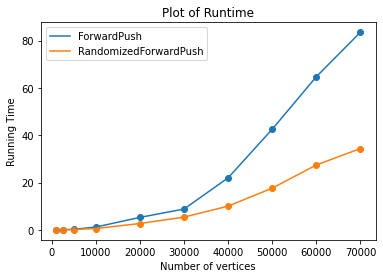

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()  
ax.scatter(vertex_set_sizes, avg_scores['Runtime_FP'])  
ax.scatter(vertex_set_sizes, avg_scores['Runtime_RFP'])  
ax.plot(vertex_set_sizes, avg_scores['Runtime_FP'], label='ForwardPush')  
ax.plot(vertex_set_sizes, avg_scores['Runtime_RFP'], label='RandomizedForwardPush')  
ax.set_xlabel('Number of vertices')  
ax.set_ylabel('Running Time')  
ax.set_title("Plot of Runtime")  
ax.legend()
fig.show()

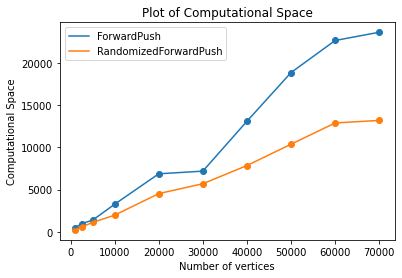

In [ ]:
fig, ax = plt.subplots()  
ax.scatter(vertex_set_sizes, avg_scores['Space_FP'])  
ax.scatter(vertex_set_sizes, avg_scores['Space_RFP'])  
ax.plot(vertex_set_sizes, avg_scores['Space_FP'], label='ForwardPush')  
ax.plot(vertex_set_sizes, avg_scores['Space_RFP'], label='RandomizedForwardPush')  
ax.set_xlabel('Number of vertices')  
ax.set_ylabel('Computational Space')  
ax.set_title("Plot of Computational Space")  
ax.legend() 

(0.0, 200.0)

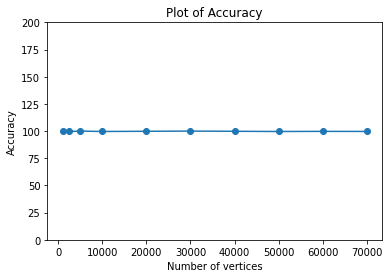

In [ ]:
fig, ax = plt.subplots() 
ax.scatter(vertex_set_sizes, avg_scores['Accuracy'])  
ax.plot(vertex_set_sizes, avg_scores['Accuracy'])   
ax.set_xlabel('Number of vertices')  
ax.set_ylabel('Accuracy')  
ax.set_title("Plot of Accuracy")  
ax.set_ylim([0,200])

Text(0.5, 1.0, 'Plot of Runtime Improvement by using RandomizedForwardPush')

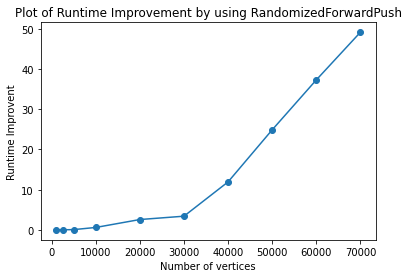

In [ ]:
fig, ax = plt.subplots()  
ax.scatter(vertex_set_sizes, avg_scores['Runtime_improvement'])   
ax.plot(vertex_set_sizes, avg_scores['Runtime_improvement'])   
ax.set_xlabel('Number of vertices')  
ax.set_ylabel('Runtime Improvent')  
ax.set_title("Plot of Runtime Improvement by using RandomizedForwardPush")  

Text(0.5, 1.0, 'Plot of Computational Space Improvement by using RandomizedForwardPush')

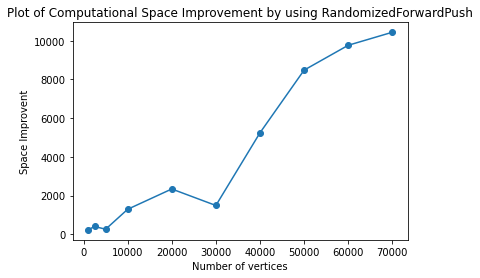

In [ ]:
fig, ax = plt.subplots()  
ax.scatter(vertex_set_sizes, avg_scores['Space_improvement'])   
ax.plot(vertex_set_sizes, avg_scores['Space_improvement'])   
ax.set_xlabel('Number of vertices')  
ax.set_ylabel('Space Improvent')  
ax.set_title("Plot of Computational Space Improvement by using RandomizedForwardPush") 